In [38]:
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
from shutil import copy
from pathlib import Path
from tqdm import tqdm
from PIL import Image

In [26]:
root = Path('logs/2023-01-17T23-36-36_deepfashion_inshop_smpl_clip/results')

In [24]:
!ls $root

concats  metrics.csv  metrics.txt  samples  ssim.csv  styles


In [27]:
df = pd.read_csv(root/'metrics.csv')

## SSIM

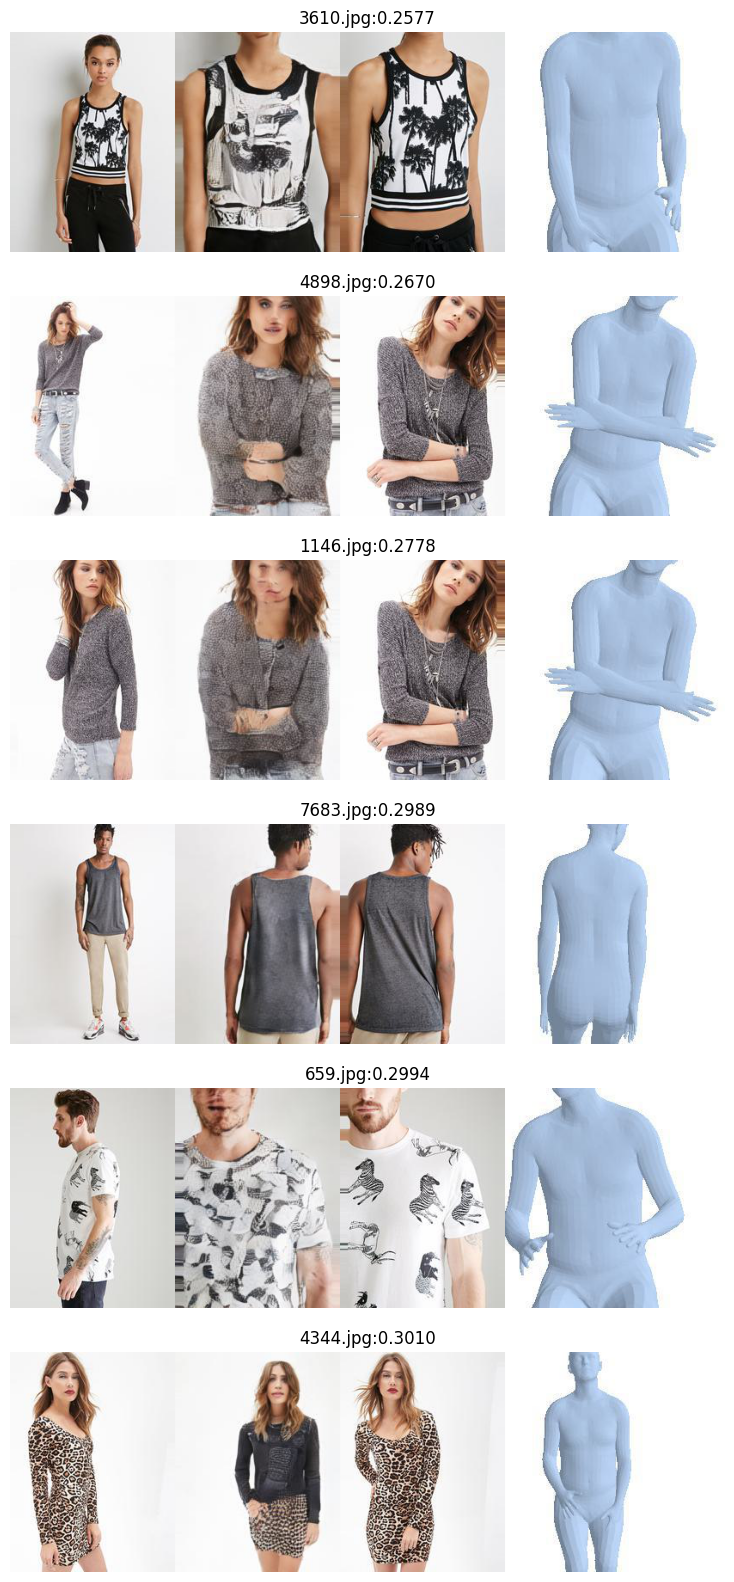

In [72]:
check_df = df.sort_values(by=['ssim'])[3:9]
fig, axs = plt.subplots(len(check_df),1, figsize=(20, 20))
for i in range(len(check_df)):
    row = check_df.iloc[i]
    image = Image.open(root/'concats'/row['name'])
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(f"{row['name']}:{row.ssim:.4f}")

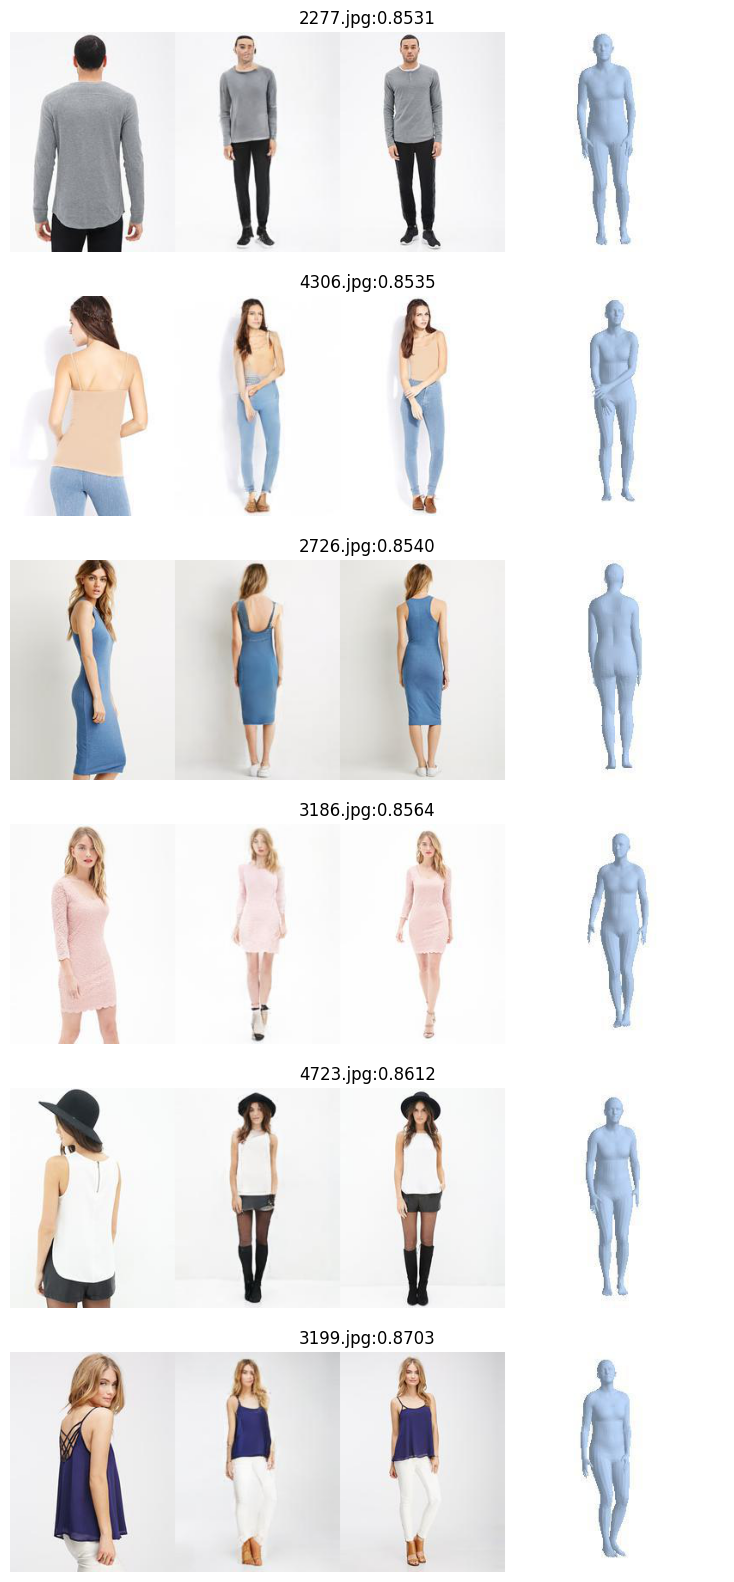

In [76]:
check_df = df.sort_values(by=['ssim'])[-6:]
fig, axs = plt.subplots(len(check_df),1, figsize=(20, 20))
for i in range(len(check_df)):
    row = check_df.iloc[i]
    image = Image.open(root/'concats'/row['name'])
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(f"{row['name']}:{row.ssim:.4f}")

## LPIPS

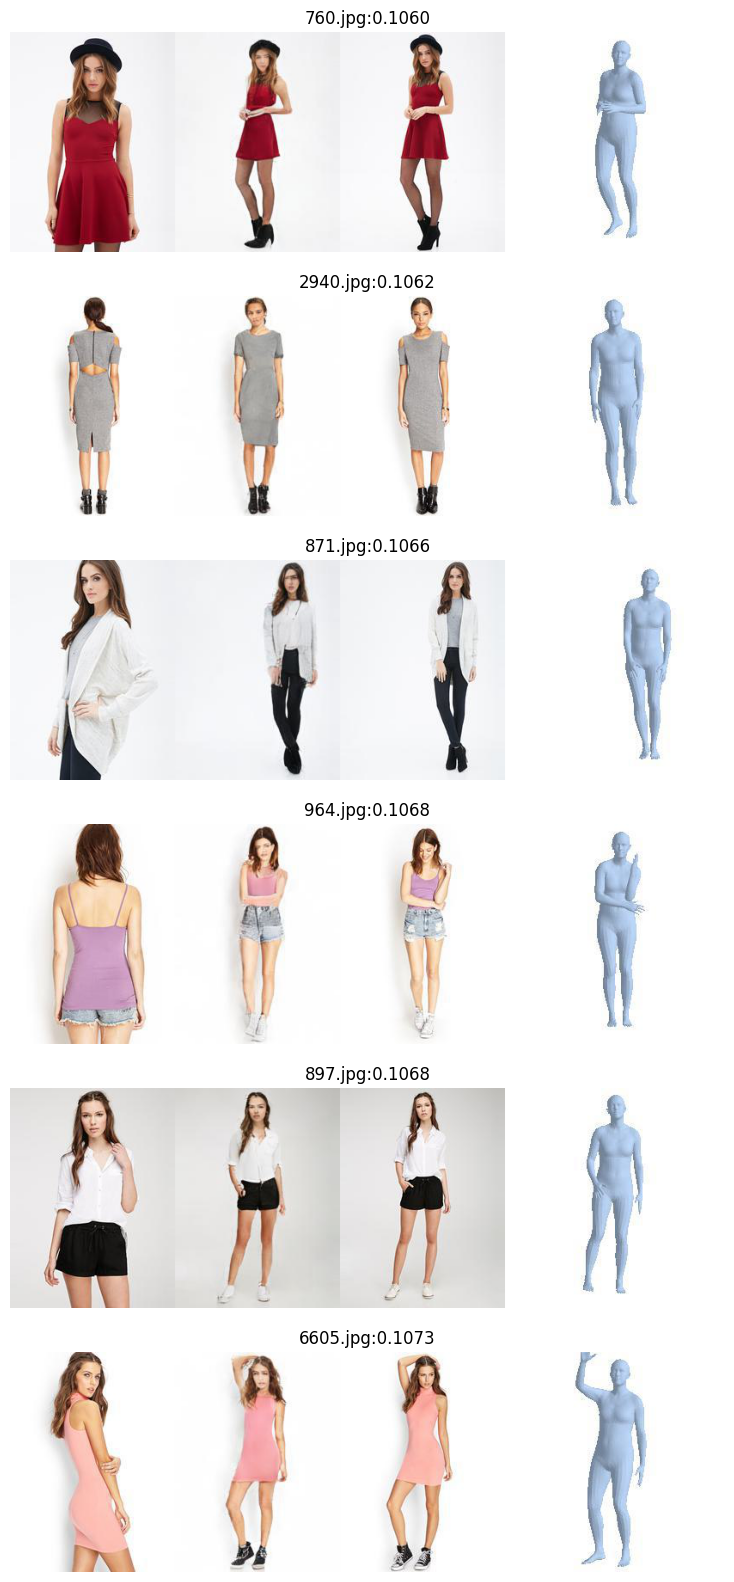

In [83]:
i = 7+6+6+6+6+6+6
check_df = df.sort_values(by=['lpips_vgg'])[i:i+6]
fig, axs = plt.subplots(len(check_df),1, figsize=(20, 20))
for i in range(len(check_df)):
    row = check_df.iloc[i]
    image = Image.open(root/'concats'/row['name'])
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(f"{row['name']}:{row.lpips_vgg:.4f}")
    

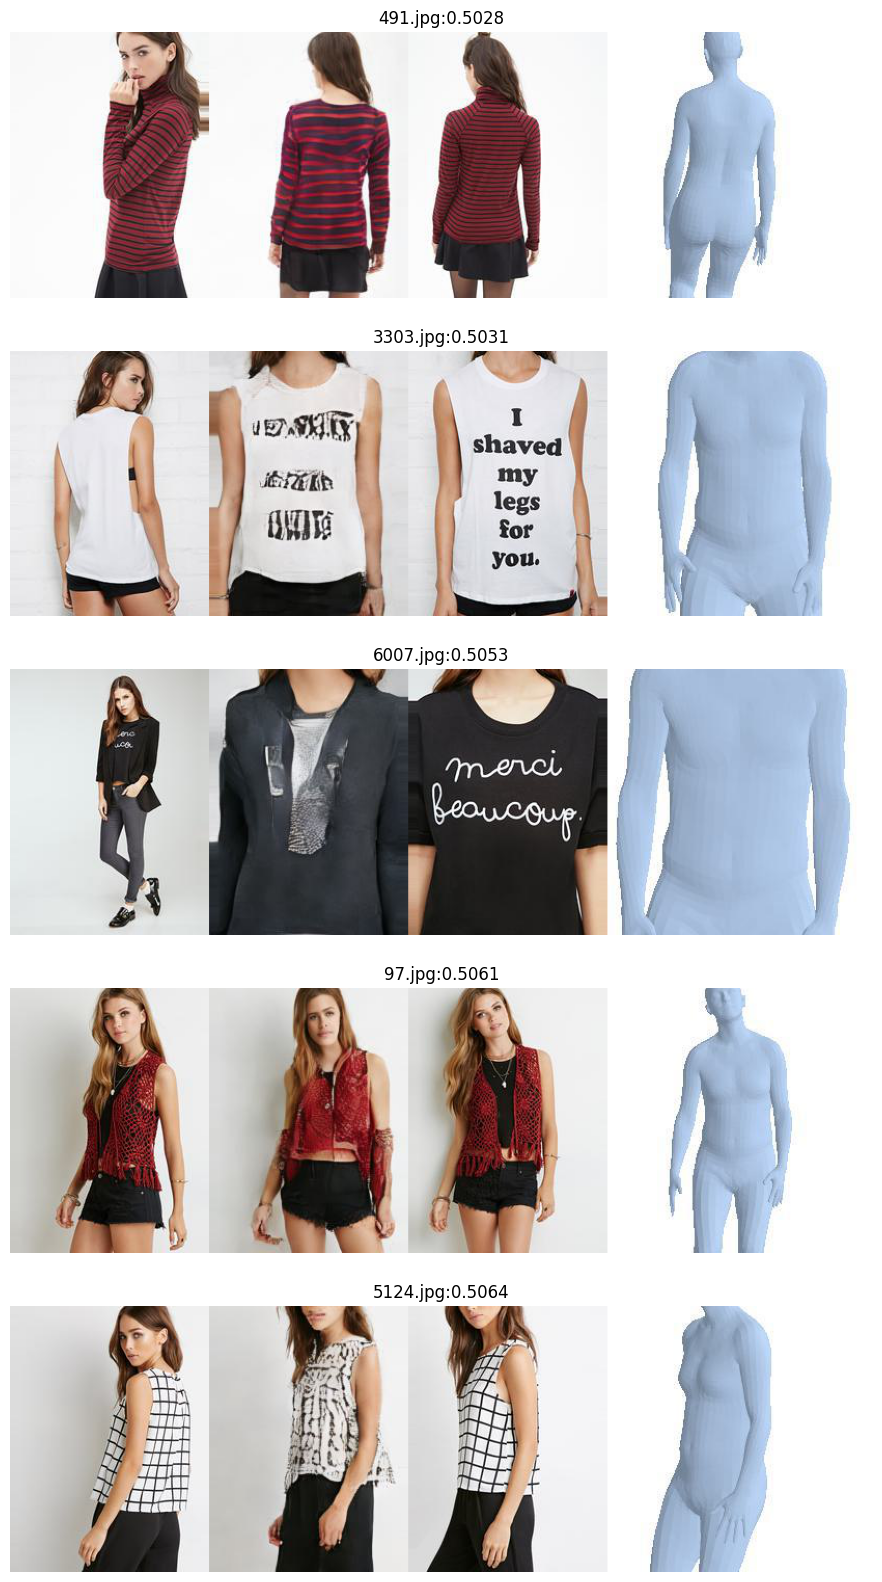

In [91]:
i = 35
check_df = df.sort_values(by=['lpips_vgg'])[-i:5-i]
fig, axs = plt.subplots(len(check_df),1, figsize=(20, 20))
for i in range(len(check_df)):
    row = check_df.iloc[i]
    image = Image.open(root/'concats'/row['name'])
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(f"{row['name']}:{row.lpips_vgg:.4f}")
    
    

In [ ]:
class Loader(Dataset):
    def __init__(self, folder, shuffle=False):
        super().__init__()
        self.shuffle = shuffle
   
    def __len__(self):
        return len(self.images)
    
    def random_sample(self):
        return self.__getitem__(randint(0, self.__len__() - 1))

    def sequential_sample(self, ind):
        if ind >= self.__len__() - 1:
            return self.__getitem__(0)
        return self.__getitem__(ind + 1)

    def skip_sample(self, ind):
        if self.shuffle:
            return self.random_sample()
        return self.sequential_sample(ind=ind)

    @abstractmethod
    def __getitem__(self, ind):
        pass

In [12]:
src_root = Path('/home/soon/datasets/deepfashion_inshop/img_256')
dst_root = Path('/home/soon/datasets/deepfashion_inshop/pose_transfer_gt')
#os.makedirs(dst_root)

In [19]:
gt_files = glob(str(dst_root/'*.jpg'))

In [20]:
gt_files.sort()

In [21]:
gt_files

['/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/0.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/10.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/100.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1000.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1001.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1002.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1003.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1004.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1005.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1006.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1007.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1008.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1009.jpg',
 '/home/soon/datasets/deepfashion_inshop/po

In [6]:
df = pd.read_csv('pairs-test.csv')
files = df.to

In [15]:
for i, f in tqdm(enumerate(files[:])):
    src = str(src_root/f)
    dst = str(dst_root/f'{i}.jpg')
    copy(src, dst)

8175it [00:00, 20775.33it/s]


In [76]:
ind = 4
sample = df.iloc[ind]
image_file = str(root_dir / sample.image)


In [77]:
face_files = image_file.replace(folder, face_folder)
face_folder = os.path.dirname(face_files)
face_embed_files = glob(os.path.join(face_folder,'*.p'))
face_embed_file = random.choice(face_embed_files)
face_file = face_file.replace('.p', '.jpg')


print(face_file)

/home/soon/datasets/deepfashion/inshop_vggface/WOMEN/Sweaters/id_00005229
/home/soon/datasets/deepfashion/inshop_vggface//WOMEN/Sweaters/id_00005229/WOMEN/Sweaters/id_00005229/03_2_side.jpg


In [78]:
face_embed_file

'/home/soon/datasets/deepfashion/inshop_vggface/WOMEN/Sweaters/id_00005229/03_2_side.p'

In [50]:
!ls $folder

MEN  MEN.zip  smpl  WOMEN  WOMEN.zip


In [51]:
image_file

'/home/soon/datasets/deepfashion_inshop/img/WOMEN/Sweaters/id_00005229/03_2_side.jpg'

In [52]:
folder

'/home/soon/datasets/deepfashion_inshop/img'

In [53]:
face_file

'/home/soon/datasets/deepfashion/inshop_vggface//WOMEN/Sweaters/id_00005229/03_2_side.jpg'

In [54]:
face_folder

'/home/soon/datasets/deepfashion/inshop_vggface//WOMEN/Sweaters/id_00005229'

In [55]:
face_file = image_file.replace(folder, face_folder)

In [56]:
image_file

'/home/soon/datasets/deepfashion_inshop/img/WOMEN/Sweaters/id_00005229/03_2_side.jpg'

In [57]:
folder

'/home/soon/datasets/deepfashion_inshop/img'

In [58]:
face_folder

'/home/soon/datasets/deepfashion/inshop_vggface//WOMEN/Sweaters/id_00005229'

In [59]:
face_file

'/home/soon/datasets/deepfashion/inshop_vggface//WOMEN/Sweaters/id_00005229/WOMEN/Sweaters/id_00005229/03_2_side.jpg'